<a href="https://colab.research.google.com/github/ValentinBarco/UPSO-ML-BD/blob/main/Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión con Scikit-Learn

In [ ]:
# Ruta de datos
example_path = "https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/5_DataMining/data/advertising.csv"

In [ ]:
# Leer datos de un archivo CSV
import pandas as pd

# Cargar transacciones
advertising = pd.read_csv(example_path).drop(['Unnamed: 0'], axis=1) # eliminar índice en el csv
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5




## El archivo de datos

El conjunto de datos contiene la cantidad gastada en publicidad (en miles de dólares) para un solo producto en un medio determinado: __TV__, __Radio__ y __Diario(Newspaper)__. __Ventas(sales)__ indica cuántos artículos se han vendido (en miles de artículos). Hay un total de 200 observaciones (representadas por filas).

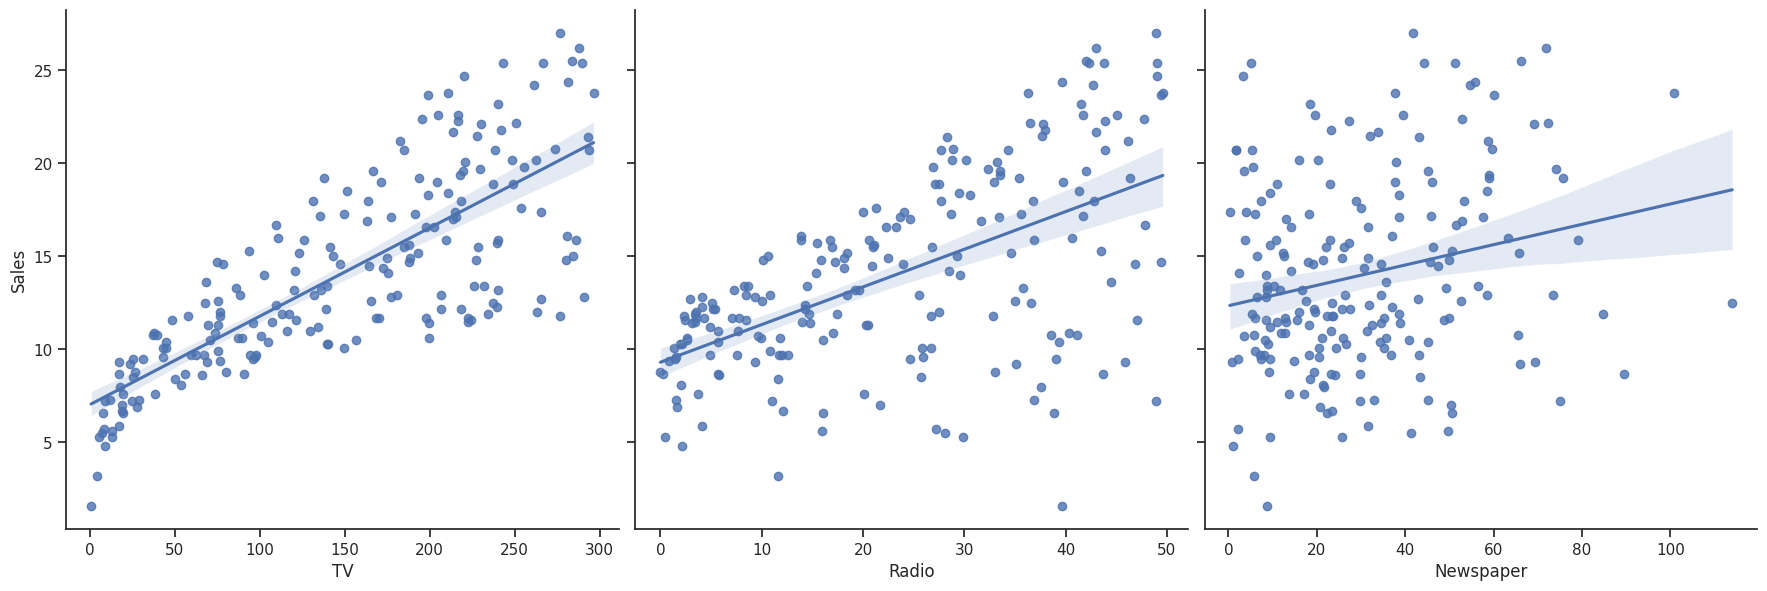

In [ ]:
# Visualicemos la relación entre las características y la respuesta usando diagramas de dispersión
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)

# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(advertising, x_vars=['TV','Radio','Newspaper'], y_vars='Sales',  height=6, aspect=1., kind='reg')

Observe que usamos la opción `kind = 'reg'` de [` sns.pairplot () `](https://seaborn.pydata.org/generated/seaborn.pairplot.html) para visualizar una regresión lineal para cada conjunto de datos.

#Recuerde que puede ser necesario verificar los supuestos de regresión

## Regresión Lineal


$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon $

- $ y $ es la respuesta
- $ \ beta_0 $ es la intersección
- $ \ beta_1 $ es el coeficiente de $ x_1 $ (la primera característica)
- $ \ beta_n $ es el coeficiente de $ x_n $ (la enésima característica)
- $ \ epsilon $ es el término de error

En este caso:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper + \epsilon$

Los valores $ \ beta $ se denominan **coeficientes del modelo**. Estos valores se "aprenden" durante el paso de ajuste del modelo, utilizando un criterio de mínimos cuadrados. Después de ajustar, podemos usar el modelo aprendido para hacer predicciones. Realizaremos el ajuste con [`sklearn.linear_model.LinearRegression ()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

In [ ]:
# Seleccione X para regresión
X = advertising[['TV', 'Radio', 'Newspaper']]
# Seleccione y para regresión
y = advertising['Sales']

La clave para tener éxito en cualquier proceso de adaptación es dividir los datos en conjuntos de prueba y de entrenamiento.
 Scikit-learn proporciona convenientemente la funcionalidad para dividir arreglos o matrices en subconjuntos aleatorios de entrenamiento y prueba [`sklearn.model_selection.train_test_split ()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [ ]:
from sklearn.model_selection import train_test_split

# random_state controla la mezcla aplicada a los datos antes de aplicar la división.
# Es crucial pasar un int para una salida reproducible a través de múltiples llamadas a funciones.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# La división predeterminada es 75% para entrenamiento y 25% para prueba
# Puede ajustar esto a través de los parámetros test_size y train_size
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


Ahora, finalmente estamos listos para realizar el ajuste:

In [ ]:
# importamos numpy y scikit-learn
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# Instancia de la regresión lineal
linear_regressor = LinearRegression()

# Ajuste el modelo a los datos de entrenamiento (aprenda los coeficientes)
fit = linear_regressor.fit(X_train, y_train)

Después del ajuste, podemos verificar la puntuación de ajuste que devuelve el coeficiente de determinación $ R ^ 2 $ de la predicción:

In [ ]:
fit.score(X_train, y_train)

0.890307557755665

Y obtenga los parámetros del ajuste lineal:

In [ ]:
# Print coefficients and intercept
print(fit.intercept_)
print(fit.coef_)

2.87696662231793
[0.04656457 0.17915812 0.00345046]


Esto significa que el modelo está definido por:
$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper + \epsilon$

Ahora que tenemos el modelo, podemos usarlo para hacer predicciones en el conjunto de pruebas:


In [ ]:
# Predict X_test
y_pred = fit.predict(X_test)
y_pred

array([21.70910292, 16.41055243,  7.60955058, 17.80769552, 18.6146359 ,
       23.83573998, 16.32488681, 13.43225536,  9.17173403, 17.333853  ,
       14.44479482,  9.83511973, 17.18797614, 16.73086831, 15.05529391,
       15.61434433, 12.42541574, 17.17716376, 11.08827566, 18.00537501,
        9.28438889, 12.98458458,  8.79950614, 10.42382499, 11.3846456 ,
       14.98082512,  9.78853268, 19.39643187, 18.18099936, 17.12807566,
       21.54670213, 14.69809481, 16.24641438, 12.32114579, 19.92422501,
       15.32498602, 13.88726522, 10.03162255, 20.93105915,  7.44936831,
        3.64695761,  7.22020178,  5.9962782 , 18.43381853,  8.39408045,
       14.08371047, 15.02195699, 20.35836418, 20.57036347, 19.60636679])

También __Mean Squared Error (MSE) __, que es la media de los errores al cuadrado:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [ ]:
print("MSE =",metrics.mean_squared_error(y_test, y_pred))

MSE = 1.9730456202283373


O la raíz:

__Root Mean Squared Error (RMSE)__: $$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE = 1.404651423032895


Dibujemos el error por muestra usando un diagrama de dispersión codificado por colores:

In [ ]:
# Calcular rmse por cada muestra
test_pred_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'RMSE':np.sqrt((y_test-y_pred)**2)})
test_pred_df.head()

,y_test,y_pred,RMSE
58,23.8,21.709103,2.090897
40,16.6,16.410552,0.189448
34,9.5,7.609551,1.890449
102,14.8,17.807696,3.007696
184,17.6,18.614636,1.014636


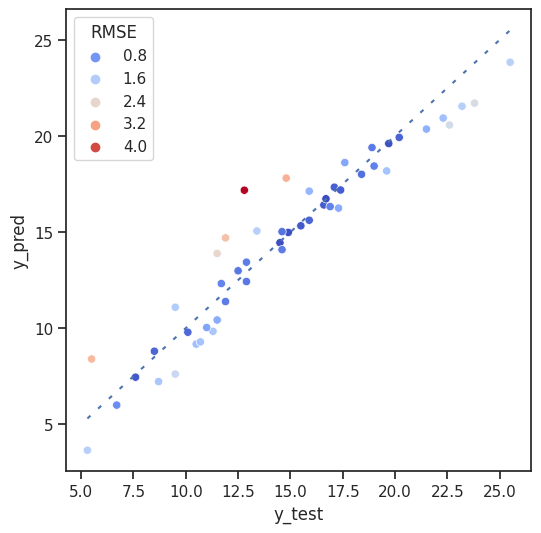

In [ ]:
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))

# Scatter plot (Gráfico de dispersión) y_test vs. y_pred
sns.scatterplot(x='y_test', y='y_pred', hue='RMSE', palette='coolwarm', data = test_pred_df)

# y_test = y_pred line. Cuanto más cerca estén los puntos de esta línea, mejor será la predicción.
X_plot = np.linspace(test_pred_df['y_test'].min(), test_pred_df['y_test'].max(), 100)
Y_plot = X_plot
plt.plot(X_plot, Y_plot, color='b', dashes=[2, 5, 2, 5])

En este punto, a menudo es muy útil evaluar cuánto contribuye cada característica a la calidad de la predicción del modelo. Ajustemos exactamente los mismos datos, pero eliminando una característica de __Newspaper__:

In [ ]:
# lista de caracteristicas
reduced_features = ['TV', 'Radio']

# Seleccione un subconjunto del DataFrame original
X_train_reduced = X_train[reduced_features]
y_train_reduced = y_train

X_test_reduced = X_test[reduced_features]
y_test_reduced = y_test

X_train_reduced

,TV,Radio
98,289.7,42.3
123,123.1,34.6
119,19.4,16.0
53,182.6,46.2
33,265.6,20.0
...,...,...
133,219.8,33.5
137,273.7,28.9
72,26.8,33.0
140,73.4,17.0


Finalmente, ajustamos un nuevo modelo con el conjunto reducido de características y calculamos __RMSE__. Observe que, en este caso, eliminar __Newspaper__ en realidad mejora un poco el rendimiento del regresor para este conjunto de datos:

In [ ]:
# Ajuste el modelo a los datos de entrenamiento (aprenda los coeficientes)
fit_reduced = linear_regressor.fit(X_train_reduced, y_train_reduced)

# hacer las predicciones
y_pred_reduced = fit_reduced.predict(X_test_reduced)

print("RMSE_reduced =",np.sqrt(metrics.mean_squared_error(y_test_reduced, y_pred_reduced)))

RMSE_reduced = 1.3879034699382888


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

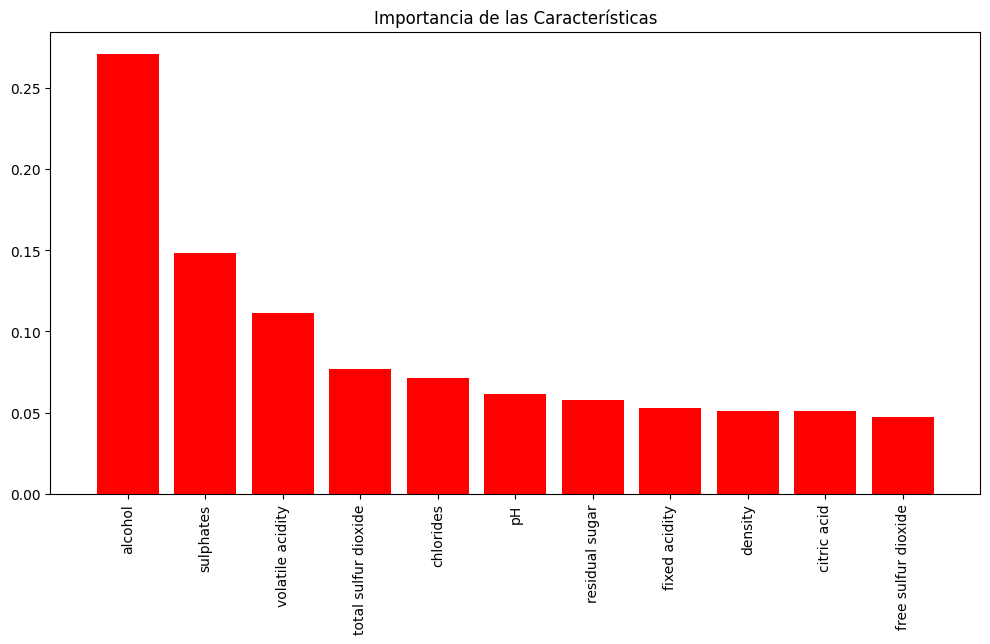

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

# Descargar el conjunto de datos de vino rojo
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
urlretrieve(url, 'winequality-red.csv')

# Leer los datos en un dataframe de pandas
data = pd.read_csv('winequality-red.csv', sep=';')

# Vistazo a los primeros registros del conjunto de datos
print(data.head())

# Seleccionar las características y la variable objetivo
X = data.drop('quality', axis=1)
y = data['quality']

# Dividir el conjunto de datos en un conjunto de entrenamiento y otro de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión de bosque aleatorio
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir los valores de calidad en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Graficar la importancia de las características
feature_importances = model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Importancia de las Características")
plt.bar(range(X_train.shape[1]), feature_importances[indices],
        color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
